# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

Pada proyek ini kami mencoba untuk melihat sejarah kurs Dolar Amerika Serikat (USD) ke Rupiah Indonesia (IDR) dari situs web exchange-rates. Exchange-Rates adalah publikasi reguler dari nilai tukar mata uang dunia dan sejarah nilai tukar mata uang. Kami akan mencoba untuk memo situs ini untuk tujuan pendidikan saja.

Mungkin ada yang bertanya mengapa kammi perlu menghapus data dari situs web ini padahal sudah memiliki visualisasi yang cukup baik. Jika kita memiliki tugas untuk membuat hubungan antara tanggal dan kurs Dolar Amerika Serikat (USD) ke Rupiah Indonesia (IDR). Diperlukan data untuk melakukan analisis tersebut. Untuk melakukan itu kita perlu memiliki data, dan scrapping adalah cara yang baik untuk mengumpulkan data yang tidak kita miliki dari publik.

Kami akan mengambil 2 point dari situs ini yaitu tanggal dan kurs Dolar Amerika Serikat (USD) ke Rupiah Indonesia (IDR) atau harga harian. Harga harian adalah harga kurs Dolar Amerika Serikat (USD) ke Rupiah Indonesia (IDR) tiap harinya

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [4]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   USD to IDR exchange rate history
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [5]:
table = soup.find('tbody')
print(table.prettify()[1:500])

tbody>
 <tr>
  <td>
   <a class="w" href="/exchange-rate-history/usd-idr-2023-04-12">
    April 12, 2023
   </a>
   <a class="n" href="/exchange-rate-history/usd-idr-2023-04-12">
    2023-4-12
   </a>
  </td>
  <td>
   <span class="w">
    <span class="nowrap">
     <span class="currencySymbol">
      $
     </span>
     1 =
    </span>
    <span class="nowrap">
     <span class="currencySymbol">
      Rp
     </span>
     14,835
    </span>
   </span>
   <span class="n">
    <span class="nowra


In [6]:
table.find_all('a', attrs={'class':'w'})[:5]

[<a class="w" href="/exchange-rate-history/usd-idr-2023-04-12">April 12, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-04-11">April 11, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-04-10">April 10, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-04-07">April 7, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-04-06">April 6, 2023</a>]

In [7]:
table.find_all('a', attrs={'class':'w'})[0].text

'April 12, 2023'

In [8]:
table.find_all('span', attrs={'class':'w'})[0].text

'$1 = Rp14,835'

Finding row length.

In [9]:
row = table.find_all('a',  attrs={'class':'w'})
row_length = len(row)
row_length

129

Do the scrapping process here (please change this markdown with your explanation)

In [10]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #get date
    date = table.find_all('a', attrs={'class':'w'})[i].text
    
    #get kurs
    kurs = table.find_all('span', attrs={'class':'w'})[i].text
    
    temp.append((date,kurs))
    
temp 

[('April 12, 2023', '$1 = Rp14,835'),
 ('April 11, 2023', '$1 = Rp14,915'),
 ('April 10, 2023', '$1 = Rp14,950'),
 ('April 7, 2023', '$1 = Rp14,941'),
 ('April 6, 2023', '$1 = Rp14,931'),
 ('April 5, 2023', '$1 = Rp14,960'),
 ('April 4, 2023', '$1 = Rp14,957'),
 ('April 3, 2023', '$1 = Rp14,922'),
 ('March 31, 2023', '$1 = Rp14,969'),
 ('March 30, 2023', '$1 = Rp15,024'),
 ('March 29, 2023', '$1 = Rp15,034'),
 ('March 28, 2023', '$1 = Rp15,060'),
 ('March 27, 2023', '$1 = Rp15,107'),
 ('March 24, 2023', '$1 = Rp15,165'),
 ('March 23, 2023', '$1 = Rp15,085'),
 ('March 22, 2023', '$1 = Rp15,253'),
 ('March 21, 2023', '$1 = Rp15,301'),
 ('March 20, 2023', '$1 = Rp15,343'),
 ('March 17, 2023', '$1 = Rp15,375'),
 ('March 16, 2023', '$1 = Rp15,429'),
 ('March 15, 2023', '$1 = Rp15,459'),
 ('March 14, 2023', '$1 = Rp15,380'),
 ('March 13, 2023', '$1 = Rp15,416'),
 ('March 10, 2023', '$1 = Rp15,503'),
 ('March 9, 2023', '$1 = Rp15,495'),
 ('March 8, 2023', '$1 = Rp15,449'),
 ('March 7, 2023', 

In [11]:
temp = temp[::-1]
temp

[('October 14, 2022', '$1 = Rp15,472'),
 ('October 17, 2022', '$1 = Rp15,441'),
 ('October 18, 2022', '$1 = Rp15,474'),
 ('October 19, 2022', '$1 = Rp15,587'),
 ('October 20, 2022', '$1 = Rp15,562'),
 ('October 21, 2022', '$1 = Rp15,537'),
 ('October 24, 2022', '$1 = Rp15,598'),
 ('October 25, 2022', '$1 = Rp15,533'),
 ('October 26, 2022', '$1 = Rp15,503'),
 ('October 27, 2022', '$1 = Rp15,560'),
 ('October 28, 2022', '$1 = Rp15,557'),
 ('October 31, 2022', '$1 = Rp15,624'),
 ('November 1, 2022', '$1 = Rp15,674'),
 ('November 2, 2022', '$1 = Rp15,685'),
 ('November 3, 2022', '$1 = Rp15,790'),
 ('November 4, 2022', '$1 = Rp15,615'),
 ('November 7, 2022', '$1 = Rp15,685'),
 ('November 8, 2022', '$1 = Rp15,638'),
 ('November 9, 2022', '$1 = Rp15,692'),
 ('November 10, 2022', '$1 = Rp15,520'),
 ('November 11, 2022', '$1 = Rp15,474'),
 ('November 14, 2022', '$1 = Rp15,554'),
 ('November 15, 2022', '$1 = Rp15,557'),
 ('November 16, 2022', '$1 = Rp15,639'),
 ('November 17, 2022', '$1 = Rp15,7

## Creating data frame & Data wrangling

Put the array into dataframe

In [12]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('date','kurs'))
df.head()

,date,kurs
0,"October 14, 2022","$1 = Rp15,472"
1,"October 17, 2022","$1 = Rp15,441"
2,"October 18, 2022","$1 = Rp15,474"
3,"October 19, 2022","$1 = Rp15,587"
4,"October 20, 2022","$1 = Rp15,562"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [13]:
df.dtypes

date    object
kurs    object
dtype: object

In [14]:
df['kurs'] = df['kurs'].str.replace('$', '')
df['kurs'] = df['kurs'].str.replace('1 =','')
df['kurs'] = df['kurs'].str.replace('Rp','')
df['kurs'] = df['kurs'].str.replace(',','')

df['kurs'] = df['kurs'].astype('int64')
df['date'] = df['date'].astype('datetime64')

df.dtypes


C:\Users\asus\AppData\Local\Temp\ipykernel_23500\4205279378.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['kurs'] = df['kurs'].str.replace('$', '')


date    datetime64[ns]
kurs             int64
dtype: object

In [15]:
df = df.set_index('date')

In [16]:
df.head()

,kurs
date,
2022-10-14,15472
2022-10-17,15441
2022-10-18,15474
2022-10-19,15587
2022-10-20,15562


Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

<AxesSubplot:xlabel='date'>

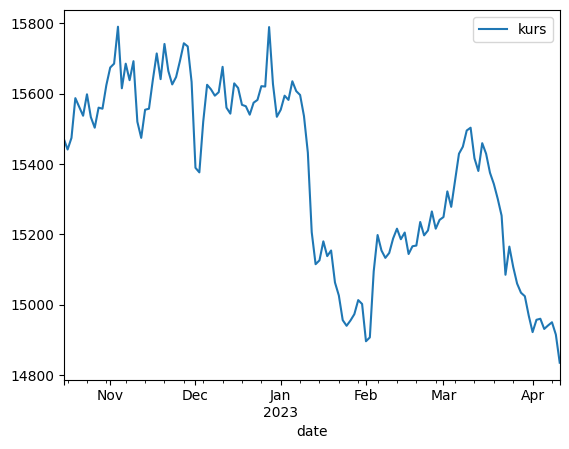

In [17]:
df.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:xlabel='date'>

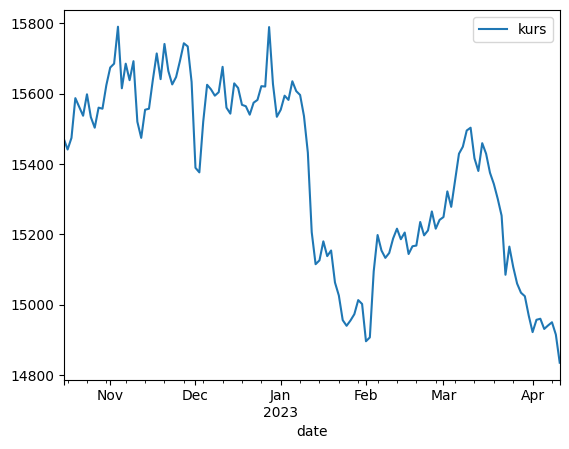

In [18]:
df.plot()

Kesimpulan yang di dapat dari grafik diatas adalah
1. Harga Kurs Dolar Amerika Serikat (USD) ke Rupiah Indonesia (IDR) mengalami fluktuasi yang cukup signifikant
2. Harga Kurs Dolar Amerika Serikat (USD) ke Rupiah Indonesia (IDR) mengalami penurunan harga di bulan April 2023 dimana pada pertengahan Maret 2023 mengalami kenaikan meskipun tidak setinggi dibulan januari 2023
3. Berdasarkan Harga Kurs Dolar Amerika Serikat (USD) ke Rupiah Indonesia (IDR) dari bulam November 2022 sampai saat ini, Harga Kurs Dolar Amerika Serikat (USD) ke Rupiah Indonesia (IDR) pada bulan April 2023 merupakan harga kurs terendah

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.